In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [42]:
df = pd.read_csv('data/banking_dataset.csv')

Verificando o conteúdo do Dataset:

In [43]:
df.head(100)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,15699461,Fiorentini,515,Spain,Male,35,10,176273.95,1,0,1,121277.78,0
96,97,15738721,Graham,773,Spain,Male,41,9,102827.44,1,0,1,64595.25,0
97,98,15693683,Yuille,814,Germany,Male,29,8,97086.40,2,1,1,197276.13,0
98,99,15604348,Allard,710,Spain,Male,22,8,0.00,2,0,0,99645.04,0


Significado das colunas:

RowNumber: Índice da linha
CustomerId: Identificador único do cliente
Surname: Sobrenome do cliente
*CreditScore: Avaliação de crédito do cliente
*Geography: País de residência
*Gender: Gênero
*Age: Idade
*Tenure: Duração do contrato (Anos)
*Balance: Saldo
*NumOfProducts: Número de produtos contratados
*HasCrCard: Possui cartão de crédito, sim ou não
*IsActiveMember: É membro ativo
*EstimatedSalary: Salário Estimado
*Exited: Cancelou on serviço, sim ou não

*: Variáveis de interesse para o estudo

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [45]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [46]:
df.duplicated().sum()

np.int64(0)

Não existem linhas duplicadas ou nulas, prosseguindo para o tratamento das variáveis categóricas

In [47]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'],drop_first=True)

In [48]:
df

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,1,39,5,0.00,2,1,0,96270.64,0,False,False
9996,9997,15569892,Johnstone,516,1,35,10,57369.61,1,1,1,101699.77,0,False,False
9997,9998,15584532,Liu,709,0,36,7,0.00,1,0,1,42085.58,1,False,False
9998,9999,15682355,Sabbatini,772,1,42,3,75075.31,2,1,0,92888.52,1,True,False


In [49]:
features = ['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_Germany','Geography_Spain'] 

In [50]:
df

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,1,39,5,0.00,2,1,0,96270.64,0,False,False
9996,9997,15569892,Johnstone,516,1,35,10,57369.61,1,1,1,101699.77,0,False,False
9997,9998,15584532,Liu,709,0,36,7,0.00,1,0,1,42085.58,1,False,False
9998,9999,15682355,Sabbatini,772,1,42,3,75075.31,2,1,0,92888.52,1,True,False


Definindo Features e Variável de Interesse

In [51]:
x = df[features]
y = df['Exited']

Separando dados de teste e treino

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Feature-Scaling

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
X_train[:5], X_test[:5]

(array([[ 0.35649971,  0.91324755, -0.6557859 ,  0.34567966, -1.21847056,
          0.80843615,  0.64920267,  0.97481699,  1.36766974, -0.57946723,
         -0.57638802],
        [-0.20389777,  0.91324755,  0.29493847, -0.3483691 ,  0.69683765,
          0.80843615,  0.64920267,  0.97481699,  1.6612541 ,  1.72572313,
         -0.57638802],
        [-0.96147213,  0.91324755, -1.41636539, -0.69539349,  0.61862909,
         -0.91668767,  0.64920267, -1.02583358, -0.25280688, -0.57946723,
          1.73494238],
        [-0.94071667, -1.09499335, -1.13114808,  1.38675281,  0.95321202,
         -0.91668767,  0.64920267, -1.02583358,  0.91539272, -0.57946723,
         -0.57638802],
        [-1.39733684,  0.91324755,  1.62595257,  1.38675281,  1.05744869,
         -0.91668767, -1.54035103, -1.02583358, -1.05960019, -0.57946723,
         -0.57638802]]),
 array([[-0.57749609,  0.91324755, -0.6557859 , -0.69539349,  0.32993735,
          0.80843615, -1.54035103, -1.02583358, -1.01960511,  1.72572

Aplicando Random Forest

N_estimators = quantidade de random trees criadas na random forest, maior precisão e maior carga de processamento

In [55]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

<Axes: >

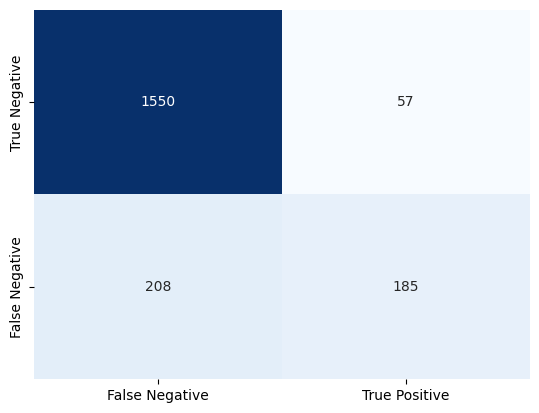

In [56]:
sns.heatmap(
    conf_matrix, 
    annot=True, 
    fmt='d', 
    cbar=False, 
    cmap='Blues', 
    xticklabels = [
        'False Negative',
        'True Positive'],
    yticklabels=[
        'True Negative',
        'False Negative'])

In [57]:
print(clf_report, accuracy)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000
 0.8675


# Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred_log_req = log_reg.predict(X_test)
conf_matrix_log_req = confusion_matrix(y_test, y_pred_log_req)
class_report_log_req = classification_report(y_test, y_pred_log_req)
accuracy_log_req = accuracy_score(y_test, y_pred_log_req)

<Axes: >

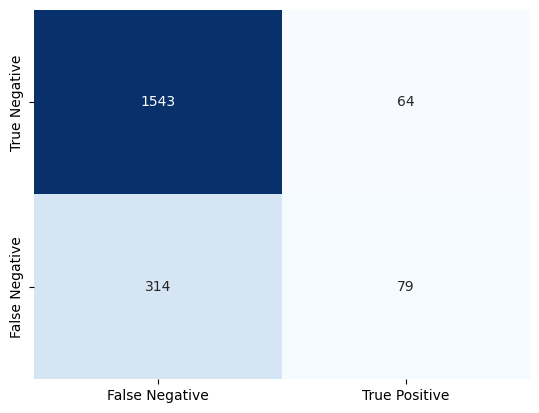

In [59]:
sns.heatmap(
    conf_matrix_log_req, 
    annot=True, 
    fmt='d', 
    cbar=False, 
    cmap='Blues', 
    xticklabels = [
        'False Negative',
        'True Positive'],
    yticklabels=[
        'True Negative',
        'False Negative'])

In [60]:

print(class_report_log_req, accuracy_log_req)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000
 0.811


Feature-Importance

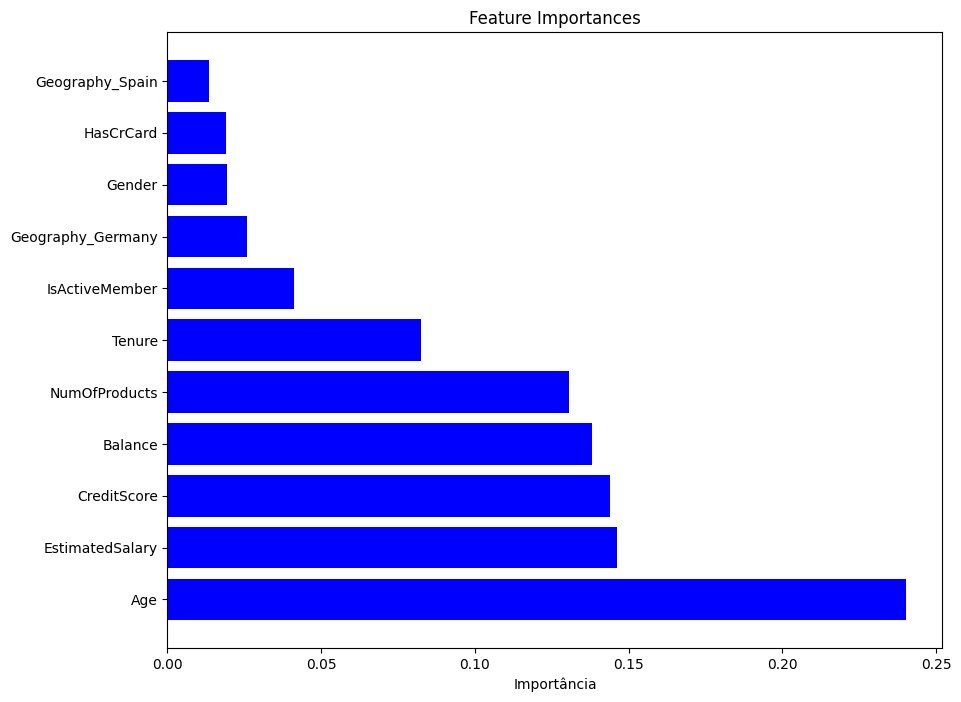

In [61]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]

plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), names)
plt.xlabel('Importância')
plt.show()

Support Vector Machines

In [62]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

/Users/cauemausec/Documents/code/customer_churn_prediction/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/cauemausec/Documents/code/customer_churn_prediction/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/cauemausec/Documents/code/customer_churn_prediction/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

<Axes: >

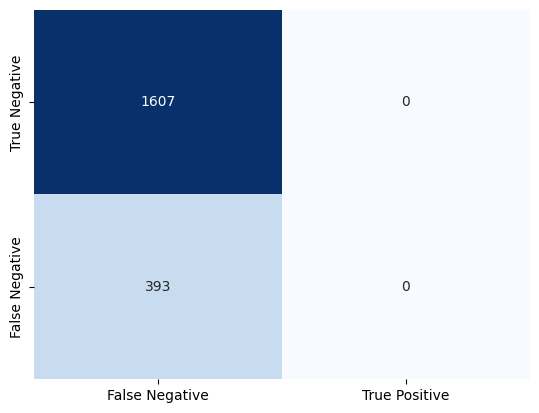

In [63]:
sns.heatmap(
    conf_matrix_svm, 
    annot=True, 
    fmt='d', 
    cbar=False, 
    cmap='Blues', 
    xticklabels = [
        'False Negative',
        'True Positive'],
    yticklabels=[
        'True Negative',
        'False Negative'])

In [64]:
print(class_report_svm, accuracy_svm)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000
 0.8035


KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)


<Axes: >

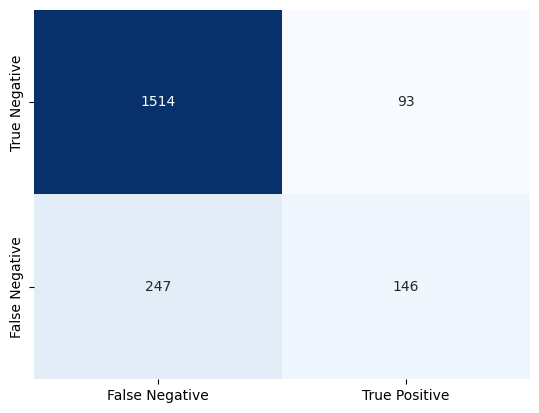

In [66]:
sns.heatmap(
    conf_matrix_knn, 
    annot=True, 
    fmt='d', 
    cbar=False, 
    cmap='Blues', 
    xticklabels = [
        'False Negative',
        'True Positive'],
    yticklabels=[
        'True Negative',
        'False Negative'])

In [67]:
print(class_report_knn, accuracy_knn)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000
 0.83


Gradient Boosting Classifier

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

<Axes: >

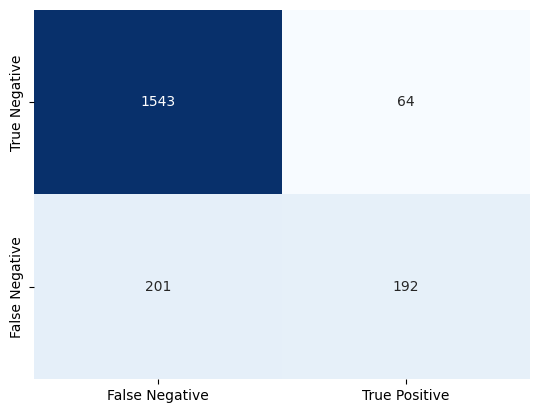

In [69]:
sns.heatmap(
    conf_matrix_gb, 
    annot=True, 
    fmt='d', 
    cbar=False, 
    cmap='Blues', 
    xticklabels = [
        'False Negative',
        'True Positive'],
    yticklabels=[
        'True Negative',
        'False Negative'])

In [70]:
print(class_report_gb, accuracy_gb)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000
 0.8675


Feature Engineering

In [71]:
df = pd.read_csv('data/banking_dataset.csv')

# Feature para verificar se o cliente tem saldo zero
df['ZeroBalance'] = (df['Balance'] == 0).astype(int)

# Feature de Faixa Etária
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 75, 85, 95], labels=['18-25', '26-35', '36-46', '46-55', '56-65', '66-75', '76-85', '86-95'])

# Feature de Saldo pelo Salário
df['BalanceToSalaryRatio'] = df['Balance'] / df['EstimatedSalary']

# Feature de Tempo de Permanência
df['TenureGroup'] = pd.cut(df['Tenure'], bins=[0,2,5,7,10], labels=['0-2', '3-5', '6-7', '8-10'])

In [72]:
label_encoder = LabelEncoder()

In [73]:
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [74]:
df = pd.get_dummies(df, columns=['Geography'],drop_first=True)

In [75]:
df['Male Germany'] = df['Gender'] * df['Geography_Germany']
df['Male Spain'] = df['Gender'] * df['Geography_Spain']

In [76]:
df = pd.get_dummies(df, columns = ['AgeGroup','TenureGroup'],drop_first = True)

In [77]:
features = [
    'CreditScore',
    'Age',
    'Tenure',
    'Balance',
    'NumOfProducts',
    'HasCrCard',
    'IsActiveMember',
    'EstimatedSalary',
    'Geography_Germany',
    'Geography_Spain',
    'ZeroBalance',
    'BalanceToSalaryRatio',
    'Male Germany',
    'Male Spain'
    ] + [col for col in df.columns if 'AgeGroup_' in col] + [col for col in df.columns if 'TenureGroup_' in col]

X = df[features]
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

<Axes: >

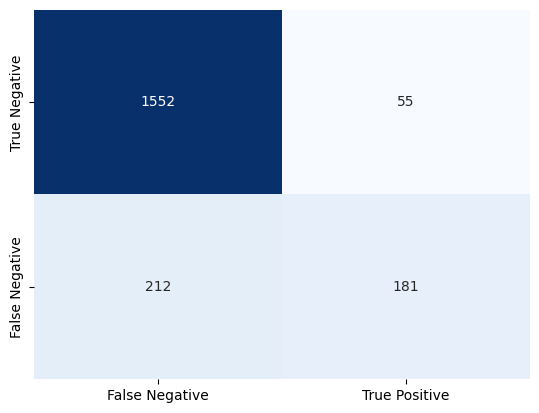

In [78]:
sns.heatmap(
    conf_matrix, 
    annot=True, 
    fmt='d', 
    cbar=False, 
    cmap='Blues', 
    xticklabels = [
        'False Negative',
        'True Positive'],
    yticklabels=[
        'True Negative',
        'False Negative'])

In [79]:
print(clf_report, accuracy)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000
 0.8665
